In [ ]:
!ls # check if shootings.csv is stored at /content/shootings.csv, if not import it

sample_data  shootings.csv


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Description of our dataset

The shootings dataset contains some information about 5925 killings in the USA between 2015 and 2020. For each killing, 15 features are given: 
- id: int, the id of the killing;
- name: string, the name of the murdered person;
- date: date, the date when the killing took place;
- manner_of_death: string, the way the person was shot (“shot” or “shot and tasered”);
- armed: string, the weapon the person was holding or “unarmed” if she had no weapon;
- age: int, the age of the shot person;
- gender: string, “M” for male, “F” for female;
- race: string, the race of the shot person (“White”, “Black”, “Asian”, “Hispanic”, “Native”, or “Other”);
- city: string, the name of the city where the killing took place;
- state: string, the name of the state where the killing took place;
- signs_of_mental_illness: Boolean, true if the person showed mental illness, false otherwise;
- threat_level: string, says if the person attacked (“attack”, “other” or “undetermined”);
- flee: string, indicates how did the person flee or “Not fleeing” otherwise;
- body_camera: Boolean, indicates if the incident was recorded;
- arms_category: string, the type of weapon used by the suspect or “Unarmed” otherwise.

### Functions for nice plots

In [ ]:
def plot_corr(corr):
    # https://seaborn.pydata.org/examples/many_pairwise_correlations.html
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    plt.figure(figsize = (30,30))
    sns.heatmap(corr, mask=mask, cmap=cmap)

In [ ]:
sns.set_style('darkgrid')
plt.rc('figure', figsize=[8, 6])

In [ ]:
shooting = pd.read_csv('/content/shootings.csv')
shooting

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


### Dataset

In [ ]:
shooting.shape

(4895, 15)

In [ ]:
for feat in shooting.columns:
  print(shooting[feat].value_counts())
  print('\n')

2043    1
661     1
4747    1
653     1
4751    1
       ..
5452    1
1358    1
3407    1
5456    1
2049    1
Name: id, Length: 4895, dtype: int64


TK TK                    29
Robert Martinez           2
Joseph Santos             2
Miguel Mercado Segura     2
Brandon Jones             2
                         ..
Wade Allen Baker          1
Cortez Bufford            1
Adam Jo Klimek            1
Joel Avery                1
Eddie Ray Maxwell         1
Name: name, Length: 4851, dtype: int64


2018-01-06    9
2018-04-01    9
2018-06-29    9
2019-01-28    8
2018-02-01    8
             ..
2018-05-01    1
2016-11-07    1
2020-02-19    1
2018-10-11    1
2017-09-16    1
Name: date, Length: 1792, dtype: int64


shot                4647
shot and Tasered     248
Name: manner_of_death, dtype: int64


gun                       2755
knife                      708
unknown                    418
unarmed                    348
toy weapon                 171
                          ... 
baseball ba

First Plots

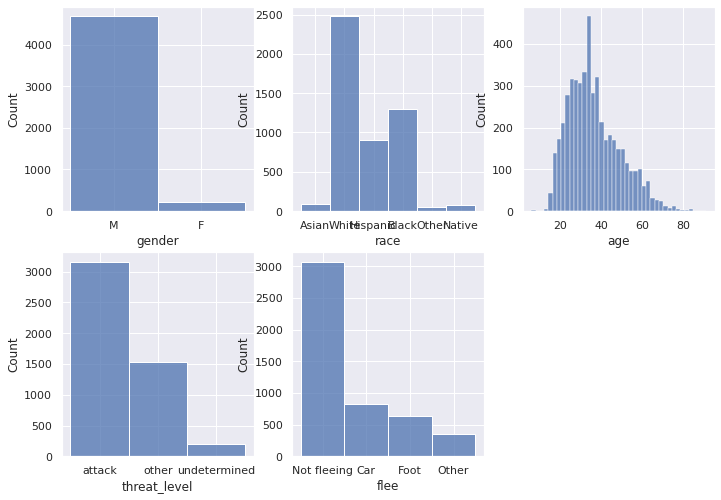

In [ ]:
# some plots that give us an idea of the dataset we are dealing with

sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.figure()

plt.subplot(2,3,1)
sns.histplot(shooting['gender'])


plt.subplot(2,3,2)
sns.histplot(shooting['race'])


plt.subplot(2,3,3)
sns.histplot(shooting['age'])


plt.subplot(2,3,4)
sns.histplot(shooting['threat_level'])


plt.subplot(2,3,5)
sns.histplot(shooting['flee'])

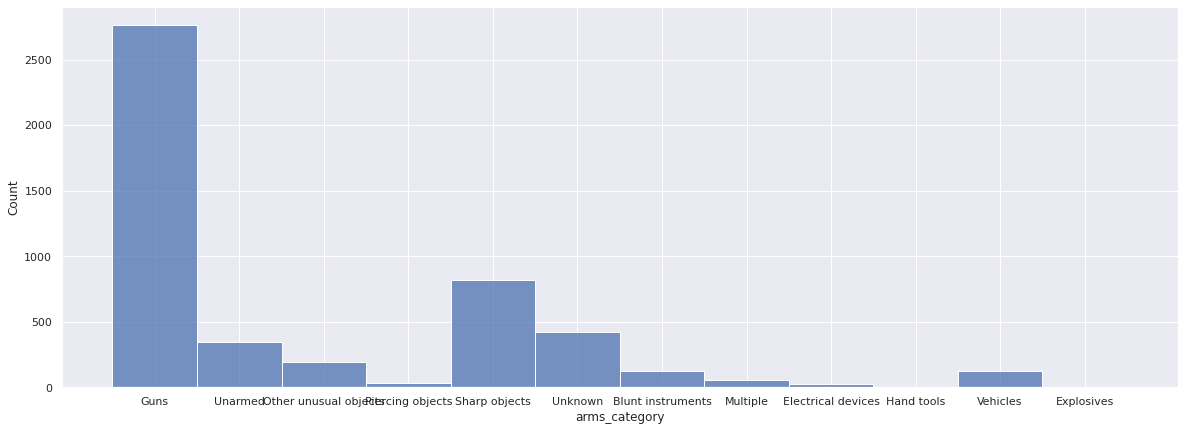

In [ ]:
plt.figure(figsize = (20,7))
sns.histplot(shooting['arms_category'])

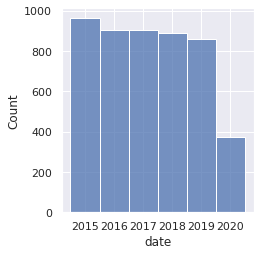

In [ ]:
def year(x):
    return x.split('-')[0]

y=shooting['date'].apply(year)

plt.subplot(2,3,6)
sns.histplot(y)

another way : 

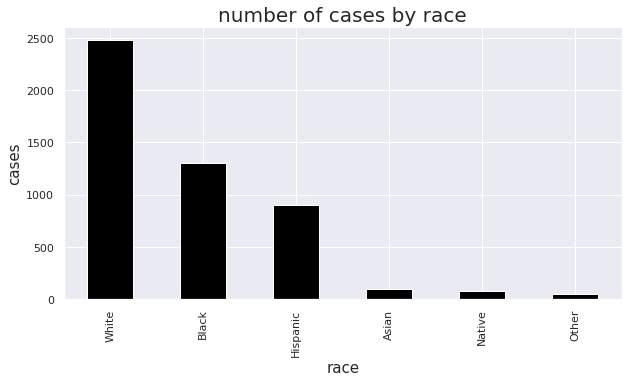

In [ ]:
def show_countplot(ds, col, color, figsize=(10,5), rotation=0):
    plt.subplots(figsize=figsize)
    title = 'number of cases by ' + col
    plt.title(title,fontsize=20)
    plt.xlabel(col,fontsize=15)
    plt.xticks(rotation=rotation)
    plt.ylabel('cases',fontsize=15)
    ds[col].value_counts().plot(kind="bar",color=color)
    plt.show()
show_countplot(shooting, 'race', "Black")


UING RATIO :

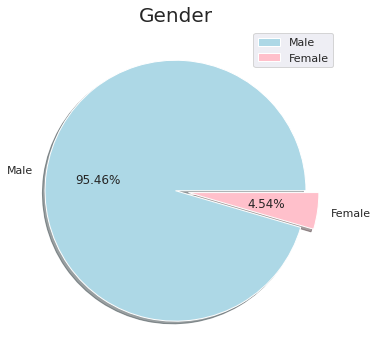

In [ ]:
labels = ['Male', 'Female']
size = shooting['gender'].value_counts()
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(size, colors = ['LightBlue', 'pink'], explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

### Visualize number of cases per state in a Map using **Folium**


In [ ]:
import folium
tmp_shooting = shooting[['id','state']]
tmp_shooting = tmp_shooting.groupby('state', as_index=False).count()
tmp_shooting = tmp_shooting.rename(columns={'id':'case'})

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

m = folium.Map(location=[48, -120], zoom_start=4)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=tmp_shooting,
    columns=['state', 'case'],
    key_on='feature.id',
    fill_color='OrRd',
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='Number of cases'
).add_to(m)

folium.LayerControl().add_to(m)

m

### Visualize number of cases per state in a Map using **Plotly express**


In [ ]:
import plotly.express as px

state_dc_1 = pd.DataFrame(shooting[['state']]['state'].value_counts()) #State death count
state_dc_1.rename(columns = {'state' : 'Count'}, inplace = True)

state_dc_2 = state_dc_1.reset_index() 
state_dc_2.rename(columns = {'index' : 'State'}, inplace = True)
state_dc_2.sort_values('Count', ascending= False, inplace = True)

fig = px.choropleth(state_dc_2, locations='State', locationmode="USA-states", color='Count', labels={'Count':'Number of death'}, scope='usa')

fig.update_layout(title = {'text': "State wise distribution of victim",'y':0.99, 'x':0.50, 'xanchor':'center', 'yanchor':'top'},  xaxis_title="Count", yaxis_title="state",
            font=dict(family="Courier New, monospace", size=16, color="RebeccaPurple"))

fig.show()

We can see that most cases are located in California CA

**Compare the number of cases per State



In [ ]:
round(shooting.state.value_counts()* 100 / len(shooting),2)


CA    14.32
TX     8.70
FL     6.62
AZ     4.54
CO     3.43
GA     3.29
OK     3.08
NC     3.02
OH     2.98
WA     2.57
TN     2.55
MO     2.53
LA     2.08
IL     2.02
PA     1.94
AL     1.94
NM     1.90
VA     1.88
IN     1.86
NY     1.84
WI     1.80
KY     1.78
NV     1.74
SC     1.63
MD     1.57
OR     1.55
AR     1.49
MI     1.45
MS     1.25
MN     1.23
NJ     1.23
UT     1.18
KS     1.00
WV     0.94
ID     0.76
AK     0.74
MA     0.67
IA     0.63
MT     0.59
HI     0.59
NE     0.49
ME     0.43
CT     0.41
SD     0.29
WY     0.27
DC     0.27
NH     0.25
ND     0.22
DE     0.20
VT     0.16
RI     0.08
Name: state, dtype: float64

*Top 5 States with shootout incidents : 


1.   CA
2.   TX
3.   FL
4.   AZ
5.   CO 


Signs of mental illness

In [ ]:
round(shooting.signs_of_mental_illness.value_counts()* 100 / len(shooting),2)

False    77.47
True     22.53
Name: signs_of_mental_illness, dtype: float64



*   22.53% of shootout deaths were having signs of Mental Illness.

*   The government needs to put in place a mental health programme to treat people properly.



### Preprocessing

Our dataset contains two numerical values (the id and the age), two boolean attributes and all other values are given as string. It is essential to process a first treatment on our data to obtain something usable: we are going to do this treatment in this preprocessing step.

First of all, we remove the id and the name from our dataset as they are not relevant for our analysis. 

In [ ]:
data = shooting.copy()
data = data.drop(['id', 'name'], axis=1)

Then, we replace the column “date” by three different columns: “year”, “month” and “day”, where “year” would be an int between 2015 and 2020, “month” an int between 1 and 12 and “day” an int between 1 and 31. This allow to have three numerical features instead of one string feature.

In [ ]:
# split date in year, month, day
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data.drop('date', axis=1, inplace=True)

data

,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,month,day
0,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,2015,1,2
1,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,2015,1,2
2,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2015,1,3
3,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,2015,1,4
4,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,2015,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices,2020,6,12
4891,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns,2020,6,12
4892,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed,2020,6,13
4893,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns,2020,6,13


In [ ]:
# custom hamming distance function
def calc_dist(x, y):
  d = 0
  for i in range(len(x)):
    if (type(x[i]) == float and not np.isnan(x[i])) or type(x[i]) == int :
        m = max(x[i], y[i])
        if m != 0:
          d += abs(x[i]-y[i])/m
    else:
        if y[i] != x[i]:
          d += 1   
  return d

def closest(df, index):
  row = list(df.loc[index])
  res = None
  dist = float('inf')
  for i in range(len(df.index)):
    if not (i == index or df.loc[i].isna().any()):
      d = calc_dist(row, list(df.loc[i]))
      if d < dist:
        dist = d
        res = df.loc[i]
  return res

def replace_by_closest(df):
  count = 0
  for i in range(len(df.index)):
    if df.loc[i].isna().any(axis=0):
      print('replace row of index ', i)
      count += 1
      df.loc[i] = closest(df, i)
  return count

In [ ]:
# handle missing values
inputational_data = data.replace({'Unknown': np.nan, 'unknown': np.nan, 'undetermined': np.nan})
count = replace_by_closest(inputational_data)
print('still some nan values: ', inputational_data.isna().any().any())
print('number of replaced lines: ', count)
inputational_data

replace row of index  15
replace row of index  26
replace row of index  27
replace row of index  45
replace row of index  52
replace row of index  59
replace row of index  64
replace row of index  97
replace row of index  104
replace row of index  121
replace row of index  122
replace row of index  137
replace row of index  144
replace row of index  164
replace row of index  165
replace row of index  169
replace row of index  178
replace row of index  184
replace row of index  198
replace row of index  200
replace row of index  219
replace row of index  224
replace row of index  238
replace row of index  242
replace row of index  261
replace row of index  275
replace row of index  277
replace row of index  295
replace row of index  296
replace row of index  304
replace row of index  338
replace row of index  342
replace row of index  344
replace row of index  345
replace row of index  348
replace row of index  366
replace row of index  378
replace row of index  404
replace row of index

,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,month,day
0,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,2015,1,2
1,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,2015,1,2
2,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2015,1,3
3,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,2015,1,4
4,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,2015,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices,2020,6,12
4891,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns,2020,6,12
4892,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed,2020,6,13
4893,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns,2020,6,13


In [ ]:
# create a dataframe with only complete records
complete_data = data.replace({'Unknown': np.nan, 'unknown': np.nan, 'undetermined': np.nan})
complete_data = complete_data[~complete_data.isnull().any(axis=1)]
print('still some nan values: ', inputational_data.isna().any().any())
complete_data.shape

still some nan values:  False


(4369, 15)

Also, for some of the algorithms and plots we need to replace all Boolean values given as “False” and “True” respectively by 0 and 1 to facilitate the treatment. The string features that only contains two possibilities (such as manner_of_death and gender) are also replaced by zeros and ones. 
'df' is the data with only strings and numerical data.

In [ ]:
num_columns = ['age', 'year', 'month', 'day']

# for FAMD
df = inputational_data.replace({False: 'False', True: 'True'})
complete_df = complete_data.replace({False: 'False', True: 'True'})
df[num_columns] = df[num_columns].replace({'False': 0, 'True': 1})
complete_df[num_columns] = complete_df[num_columns].replace({'False': 0, 'True': 1})

# transform true in 1 and false in 0, M (Male) by 1 and F (Female) by 0, 
# shot and Tasered by 1 and shot by 0, attack by 1 and other by 0
inputational_data = inputational_data.replace({False: 0, True: 1, 'M': 1, 'F': 0, 'shot': 0, 'shot and Tasered': 1})
inputational_data['threat_level'] = inputational_data['threat_level'].replace({'attack': 1, 'other': 0})

Finally, we do a one hot encoding with the remaining non-numerical columns. This method consists into converting each string column into multiple binary columns. This is done with the function get_dummies.

In [ ]:
# one hot encoding
numerical_columns = ['manner_of_death', 'age', 'gender', 'signs_of_mental_illness', 
                     'body_camera', 'year', 'month', 'day', 'threat_level']
# for correlation: we will not plot city and state because it has too many possible values
corr_columns = ['armed', 'race', 'flee', 'arms_category'] 
nominal_columns = corr_columns + ['city', 'state'] 
data_text = inputational_data.loc[:, nominal_columns]
data_encoding = pd.get_dummies(data_text)
num_data = pd.concat([inputational_data.loc[:, numerical_columns] , data_encoding], axis=1)

data_text = inputational_data.loc[:, corr_columns]
data_encoding = pd.get_dummies(data_text)
corr_data = pd.concat([inputational_data.loc[:, numerical_columns] , data_encoding], axis=1)

num_data

,manner_of_death,age,gender,signs_of_mental_illness,body_camera,year,month,day,threat_level,armed_BB gun,armed_BB gun and vehicle,armed_Taser,armed_air pistol,armed_ax,armed_barstool,armed_baseball bat,armed_baseball bat and bottle,armed_baseball bat and fireplace poker,armed_baseball bat and knife,armed_baton,armed_bean-bag gun,armed_beer bottle,armed_blunt object,armed_bow and arrow,armed_box cutter,armed_brick,"armed_car, knife and mace",armed_chain,armed_chain saw,armed_chainsaw,armed_chair,armed_contractor's level,armed_cordless drill,armed_crossbow,armed_crowbar,armed_fireworks,armed_flagpole,armed_flashlight,armed_garden tool,armed_glass shard,...,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0,53.0,1,1,0,2015,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,47.0,1,0,0,2015,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,23.0,1,0,0,2015,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,32.0,1,1,0,2015,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,39.0,1,0,0,2015,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,0,27.0,1,0,1,2020,6,12,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4891,0,23.0,1,0,0,2020,6,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4892,0,25.0,0,0,0,2020,6,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4893,0,22.0,1,0,0,2020,6,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We standardize values with the standard scaler.

---



In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# Standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

In [ ]:
# We usually denote the feature matrix `X`, where rows represents observations,
# and columns represents individual features.
X = num_data[num_columns].values
X_complete = complete_df[num_columns].values
X_num = num_data.values

In [ ]:
std_scale = StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
print(X_scaled)
print(X_scaled.shape)

c_std_scale = StandardScaler().fit(X_complete)
c_X_scaled = c_std_scale.transform(X_complete)
print(c_X_scaled)
print(c_X_scaled.shape)

n_std_scale = StandardScaler().fit(X_num)
n_X_scaled = n_std_scale.transform(X_num)
print(n_X_scaled)
print(n_X_scaled.shape)

[[ 1.30318726 -1.33810779 -1.41592733 -1.51866079]
 [ 0.82702816 -1.33810779 -1.41592733 -1.51866079]
 [-1.07760828 -1.33810779 -1.41592733 -1.40452223]
 ...
 [-0.91888857  1.79378359  0.0279634  -0.2631366 ]
 [-1.15696813  1.79378359  0.0279634  -0.2631366 ]
 [-0.44272947  1.79378359  0.0279634  -0.03485948]]
(4895, 4)
[[ 1.26502249e+00 -1.39513085e+00 -1.45063028e+00 -1.52587175e+00]
 [ 7.95494722e-01 -1.39513085e+00 -1.45063028e+00 -1.52587175e+00]
 [-1.08261633e+00 -1.39513085e+00 -1.45063028e+00 -1.41210061e+00]
 ...
 [-9.26107075e-01  1.73163979e+00 -7.96429673e-04 -2.74389219e-01]
 [-1.16087096e+00  1.73163979e+00 -7.96429673e-04 -2.74389219e-01]
 [-4.56579312e-01  1.73163979e+00 -7.96429673e-04 -4.68469398e-02]]
(4369, 4)
[[-0.23003175  1.30318726  0.2101316  ... -0.13685938 -0.10055562
  -0.0474579 ]
 [-0.23003175  0.82702816  0.2101316  ... -0.13685938 -0.10055562
  -0.0474579 ]
 [ 4.34722601 -1.07760828  0.2101316  ... -0.13685938 -0.10055562
  -0.0474579 ]
 ...
 [-0.2300317

In [ ]:
# Mean and variance per columns (axis=0) before scaling
print(np.mean(X, axis=0), np.var(X, axis=0))
print(np.mean(X_complete, axis=0), np.var(X_complete, axis=0))
print(np.mean(X_num, axis=0), np.var(X_num, axis=0))
print('\n')
# After scaling
# The mean is close to 0 (not exactly due to the limited precision of computers)
# and the variance is 1. Scaling the variance to 1 for every features allows us
# to give the same importance to the variations of each features, even though they
# may have different amplitudes in the original dataset.
print(np.mean(X_scaled, axis=0), np.var(X_scaled, axis=0))
print(np.mean(c_X_scaled, axis=0), np.var(c_X_scaled, axis=0))
print(np.mean(n_X_scaled, axis=0), np.var(n_X_scaled, axis=0))

[  36.57875876 2017.13626149    5.9031665    15.30541369] [158.78091785   2.54874639  11.99144043  76.76004219]
[  36.83453437 2017.2309453     6.00274662   15.41176471] [163.29765452   2.55710144  11.89333189  77.25663431]
[5.02553626e-02 3.65787588e+01 9.57711951e-01 ... 1.83861083e-02
 1.00102145e-02 2.24719101e-03] [4.77297611e-02 1.58780918e+02 4.04997699e-02 ... 1.80480593e-02
 9.91001011e-03 2.24214114e-03]


[ 2.28622024e-16 -6.96288334e-14  1.04512925e-16  8.70941045e-18] [1. 1. 1. 1.]
[-9.67665204e-17  6.93206078e-14  6.50531230e-18 -4.55371861e-17] [1. 1. 1. 1.]
[ 7.54815572e-17  2.28622024e-16 -2.27896240e-16 ... -1.88703893e-17
 -8.70941045e-18  1.95961735e-17] [1. 1. 1. ... 1. 1. 1.]


In [ ]:
# We reconstruct the dataframe
df_scaled = df.copy()
df_scaled[num_columns] = X_scaled
complete_df[num_columns] = c_X_scaled
num_data_scaled = pd.DataFrame(n_X_scaled, columns=num_data.columns, index=num_data.index)
print(df_scaled)
print(complete_df)
print(num_data_scaled)

       manner_of_death       armed       age  ...      year     month       day
0                 shot         gun  1.303187  ... -1.338108 -1.415927 -1.518661
1                 shot         gun  0.827028  ... -1.338108 -1.415927 -1.518661
2     shot and Tasered     unarmed -1.077608  ... -1.338108 -1.415927 -1.404522
3                 shot  toy weapon -0.363370  ... -1.338108 -1.415927 -1.290384
4                 shot    nail gun  0.192149  ... -1.338108 -1.415927 -1.290384
...                ...         ...       ...  ...       ...       ...       ...
4890              shot       Taser -0.760169  ...  1.793784  0.027963 -0.377275
4891              shot         gun -1.077608  ...  1.793784  0.027963 -0.377275
4892              shot     unarmed -0.918889  ...  1.793784  0.027963 -0.263137
4893              shot         gun -1.156968  ...  1.793784  0.027963 -0.263137
4894              shot         gun -0.442729  ...  1.793784  0.027963 -0.034859

[4895 rows x 15 columns]
       manner_

### Correlation

In [ ]:
# we will check the correlation only on a subset of data (without states and cities)
corr_data

,manner_of_death,age,gender,signs_of_mental_illness,body_camera,year,month,day,threat_level,armed_BB gun,armed_BB gun and vehicle,armed_Taser,armed_air pistol,armed_ax,armed_barstool,armed_baseball bat,armed_baseball bat and bottle,armed_baseball bat and fireplace poker,armed_baseball bat and knife,armed_baton,armed_bean-bag gun,armed_beer bottle,armed_blunt object,armed_bow and arrow,armed_box cutter,armed_brick,"armed_car, knife and mace",armed_chain,armed_chain saw,armed_chainsaw,armed_chair,armed_contractor's level,armed_cordless drill,armed_crossbow,armed_crowbar,armed_fireworks,armed_flagpole,armed_flashlight,armed_garden tool,armed_glass shard,...,armed_pole and knife,armed_rock,armed_samurai sword,armed_scissors,armed_screwdriver,armed_sharp object,armed_shovel,armed_spear,armed_stapler,armed_straight edge razor,armed_sword,armed_toy weapon,armed_unarmed,armed_vehicle,armed_vehicle and gun,armed_vehicle and machete,armed_walking stick,armed_wasp spray,armed_wrench,race_Asian,race_Black,race_Hispanic,race_Native,race_Other,race_White,flee_Car,flee_Foot,flee_Not fleeing,flee_Other,arms_category_Blunt instruments,arms_category_Electrical devices,arms_category_Explosives,arms_category_Guns,arms_category_Hand tools,arms_category_Multiple,arms_category_Other unusual objects,arms_category_Piercing objects,arms_category_Sharp objects,arms_category_Unarmed,arms_category_Vehicles
0,0,53.0,1,1,0,2015,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,0,47.0,1,0,0,2015,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,1,23.0,1,0,0,2015,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,32.0,1,1,0,2015,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,0,39.0,1,0,0,2015,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,0,27.0,1,0,1,2020,6,12,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4891,0,23.0,1,0,0,2020,6,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4892,0,25.0,0,0,0,2020,6,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4893,0,22.0,1,0,0,2020,6,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


                                     manner_of_death  ...  arms_category_Vehicles
manner_of_death                             1.000000  ...               -0.038294
age                                        -0.004454  ...               -0.061257
gender                                      0.020458  ...               -0.077821
signs_of_mental_illness                     0.053788  ...               -0.062126
body_camera                                 0.022422  ...               -0.020575
...                                              ...  ...                     ...
arms_category_Other unusual objects        -0.006299  ...               -0.034893
arms_category_Piercing objects              0.052362  ...               -0.013290
arms_category_Sharp objects                 0.179269  ...               -0.078692
arms_category_Unarmed                       0.073641  ...               -0.049050
arms_category_Vehicles                     -0.038294  ...                1.000000

[115 rows x 115

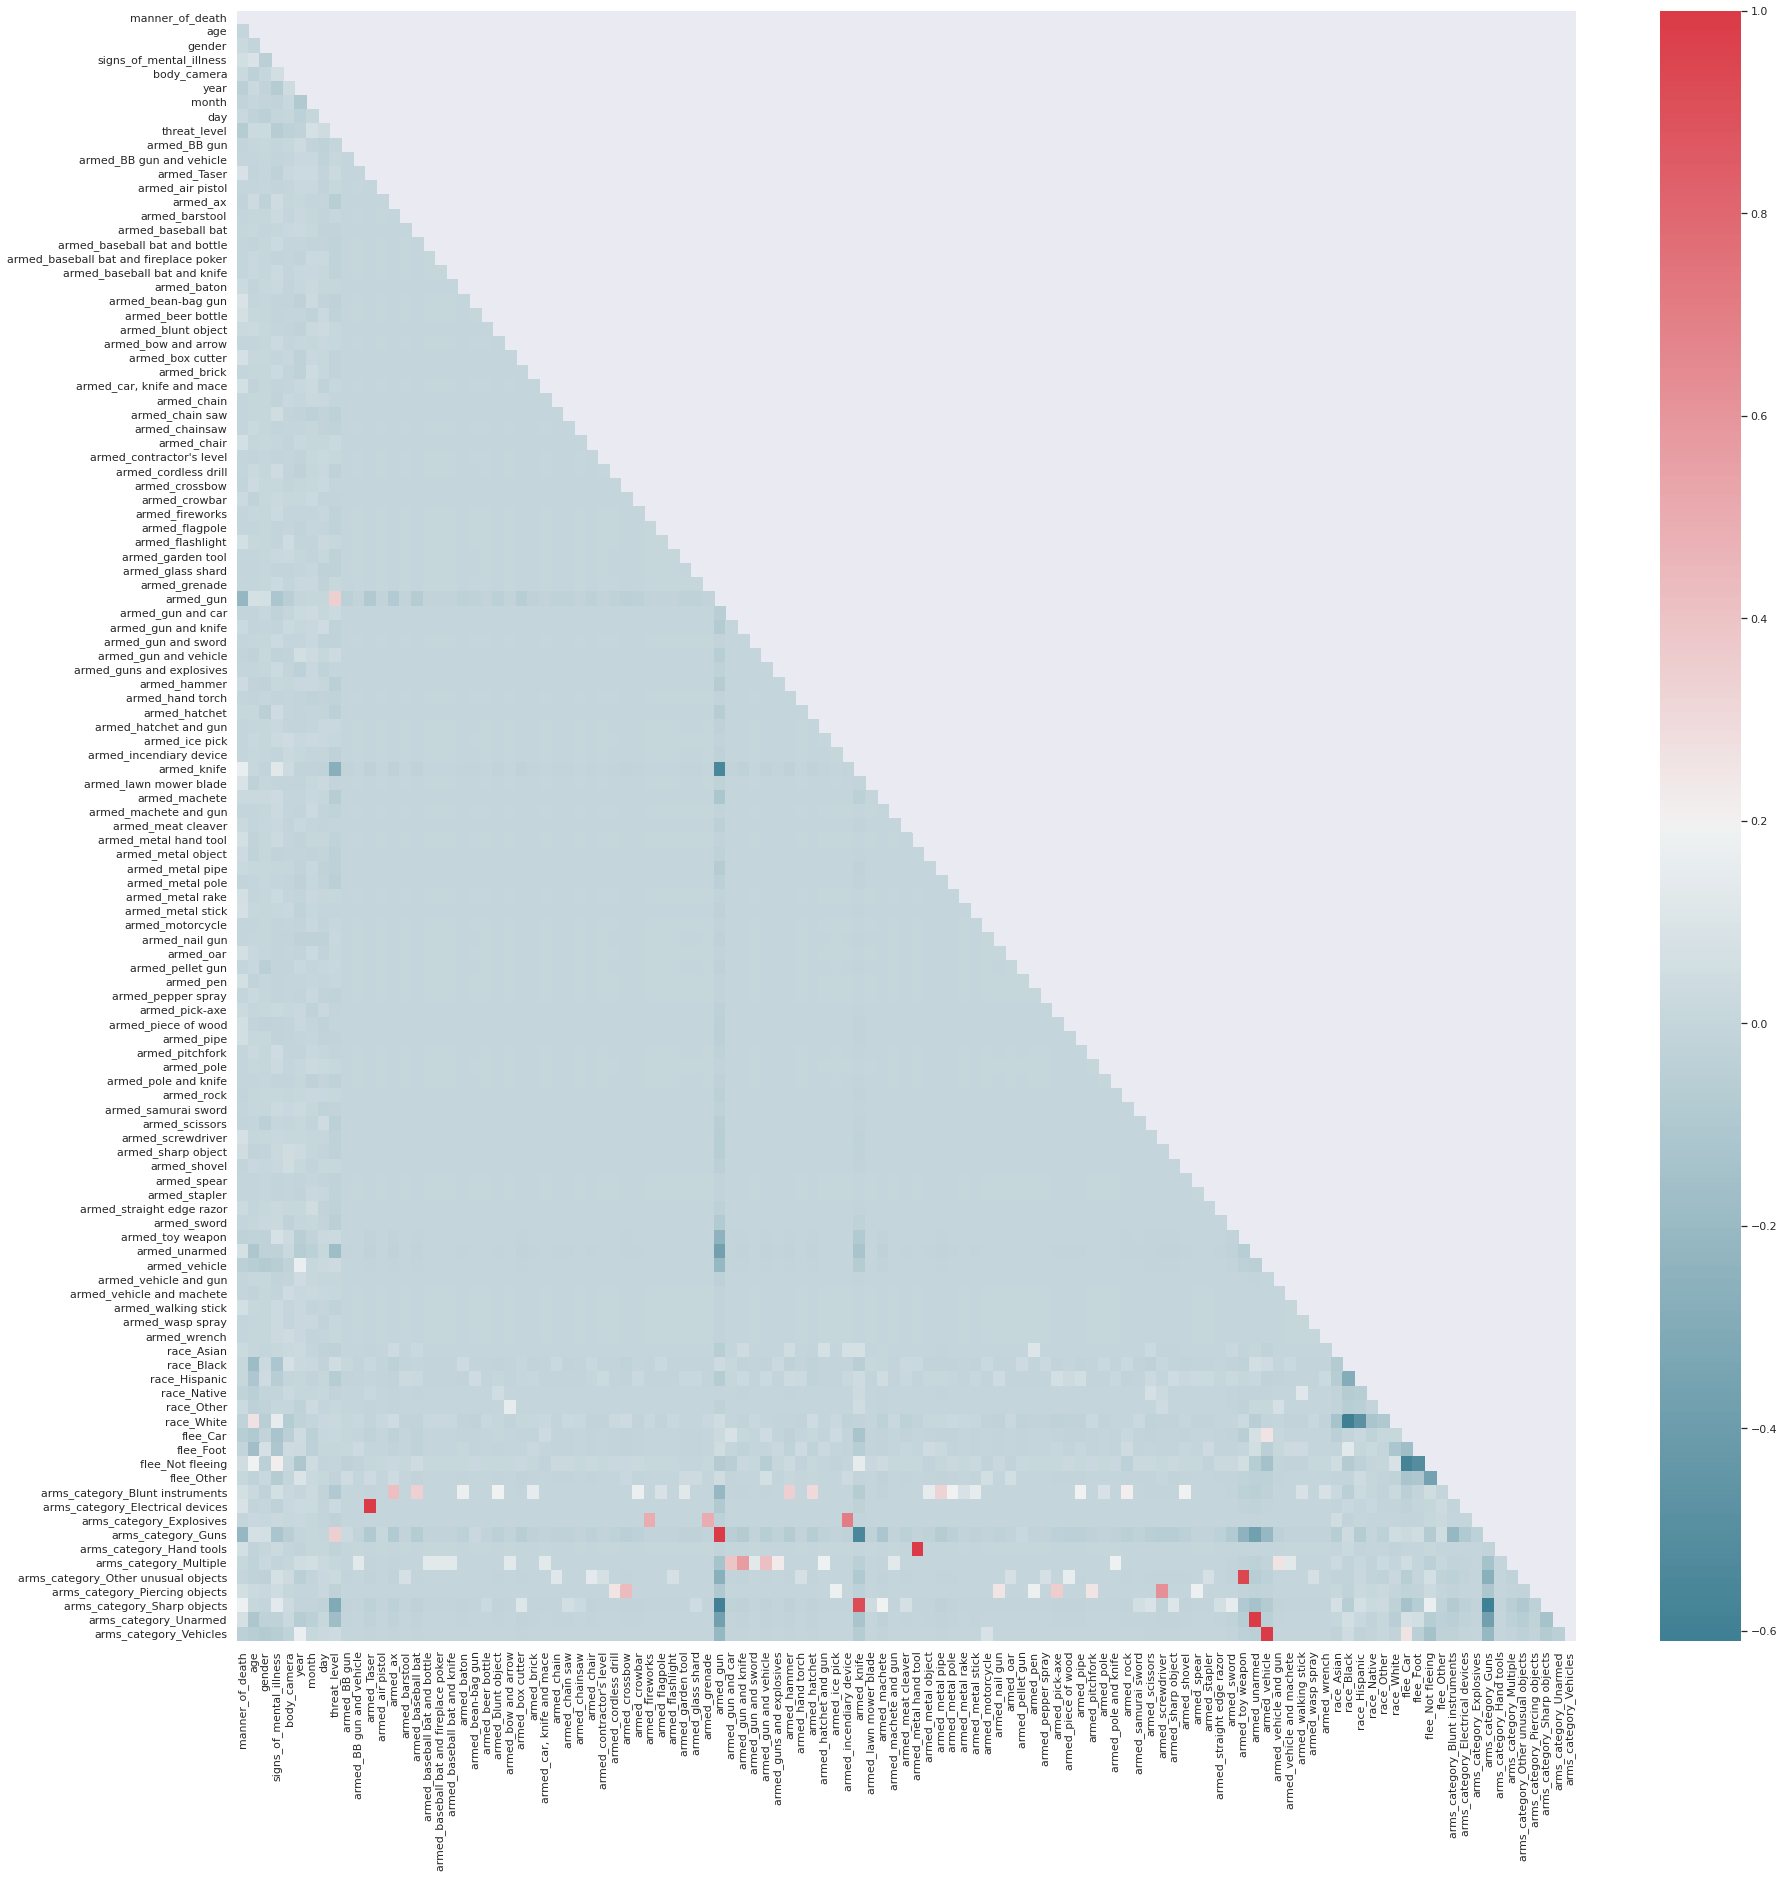

In [ ]:
# https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
# [...] it has a value between +1 and −1, where 1 is total positive linear correlation,
# 0 is no linear correlation, and −1 is total negative linear correlation.
corr = corr_data.corr()
print(corr)
plot_corr(corr)

We can observe that this correlation matrix is consistent by looking at the correlation between two features that we know they are linked. For instance, *race_Black* and *race_White* are strongely negatively linked, which is evident as a white person can not be a black person. In the same idea, *arms_category_Guns* is strongely positively related with *armed_gun*, which is obvious as a gun is in the arm category Guns. 

Now let us have a look at the less evident correlations. The column *treat_level* is linked negatively with the arms categories "Sharp objects" but linked positively with the "Guns" one. This means that the threat level is generally much more important when the person has a gun than when she has a sharp object. Another interesting thing is in the column *signs_of_mental_illness*. We can see a correlation coefficient of about 0.2 with the feature *flee_Not fleeing*. It might mean that people with mental illness are less familiar with fleeing, but we can not ensure that as a coefficient of 0.2 represents a weak correlation.

### FAMD with prince

https://en.wikipedia.org/wiki/Factor_analysis_of_mixed_data

In statistics, factor analysis of mixed data (FAMD), or factorial analysis of mixed data, is the factorial method devoted to data tables in which a group of individuals is described both by quantitative and qualitative variables. The term mixed refers to the use of both quantitative and qualitative variables. Roughly, we can say that FAMD works as a principal components analysis (PCA) for quantitative variables and as a multiple correspondence analysis (MCA) for qualitative variables. 

In [ ]:
!pip install prince
from prince import FAMD

[0.00289421 0.00278427 0.00259915 0.00245867 0.00165937 0.00122289
 0.00121014 0.0011348  0.00113438 0.001114  ]


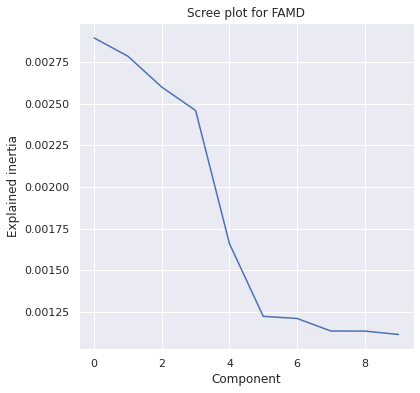

In [ ]:
# Fit FAMD with inputational data
famd = FAMD(n_components = 10, n_iter = 5, random_state = 42)
famd.fit(df_scaled)
print(famd.explained_inertia_)
plt.figure()
plt.title('Scree plot for FAMD')
plt.xlabel('Component')
plt.ylabel('Explained inertia')
plt.plot(range(10), famd.explained_inertia_)

We can see that the explained inertia is incredibly low (around 0.3% for both first and second component) so we will not be able to do strong interpretations from our results.

[0.00289952 0.00274066 0.00253488 0.00234803 0.00165963 0.00122003
 0.0012061  0.00113656 0.00112962 0.00110511]


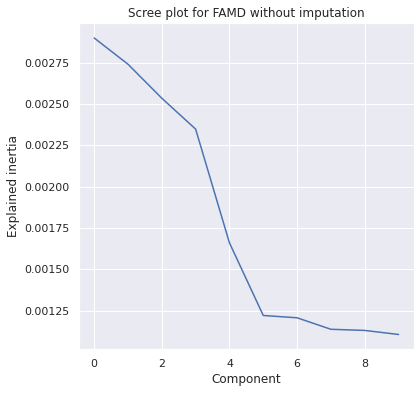

In [ ]:
# Fit FAMD with complete data
_famd = FAMD(n_components = 10, n_iter = 5, random_state = 42)
_famd.fit(complete_df)
print(_famd.explained_inertia_)
plt.figure()
plt.title('Scree plot for FAMD without imputation')
plt.xlabel('Component')
plt.ylabel('Explained inertia')
plt.plot(range(10), _famd.explained_inertia_)

We can see that imputation did not really affect the scree plot.

manner_of_death
gender
race
signs_of_mental_illness
threat_level
flee
body_camera
year


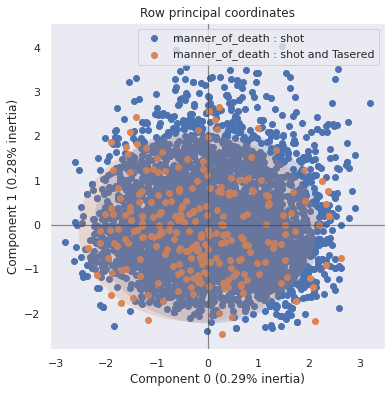

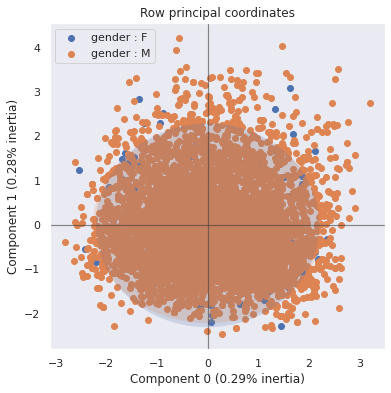

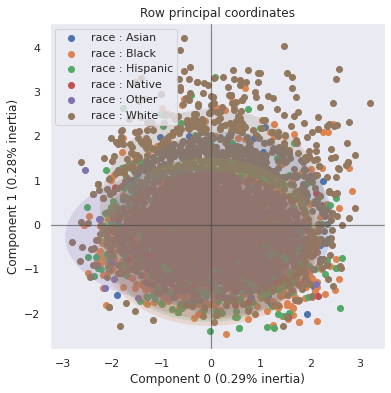

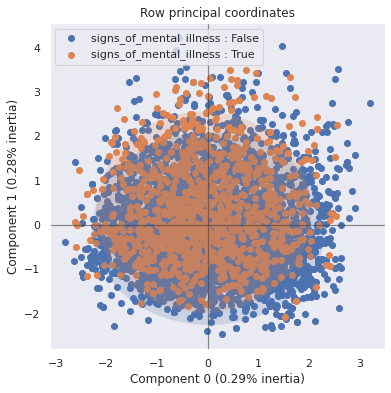

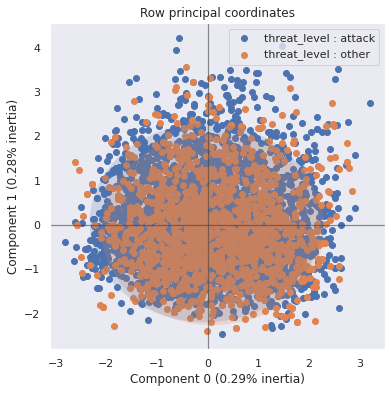

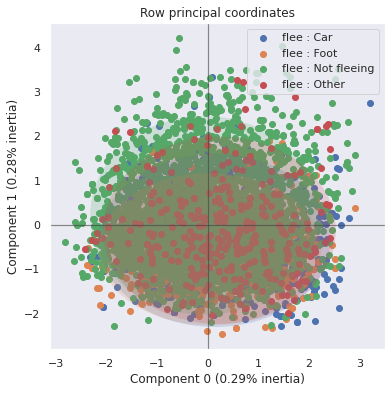

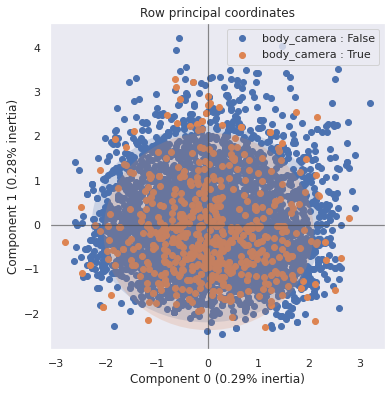

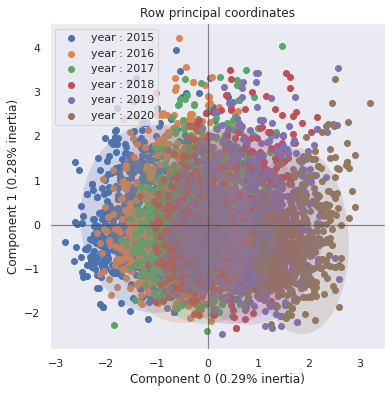

In [ ]:
# plot of the representation of individuals

for c in df.columns:
  l = [c + ' : {}'.format(t) for t in df[c]]
  if len(set(l)) < 10:
    print(c)
    famd.plot_row_coordinates(
        df,
        ax=None,
        figsize=(6, 6),
        x_component=0,
        y_component=1,
        labels=None,
        color_labels=l,
        ellipse_outline=False,
        ellipse_fill=True,
        show_points=True
      )

We can distinguish 6 clusters in our data, which actually seem to correspond to the years. However, it is only 0.29% and 0.28% of inertia so it does not explain much on the data.

manner_of_death
gender
race
signs_of_mental_illness
threat_level
flee
body_camera
year


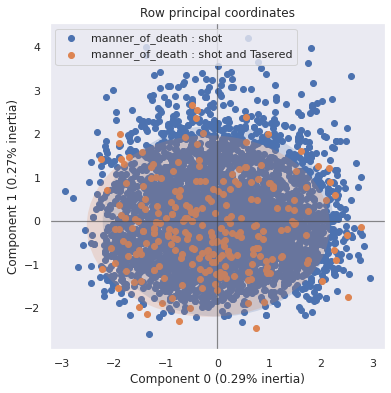

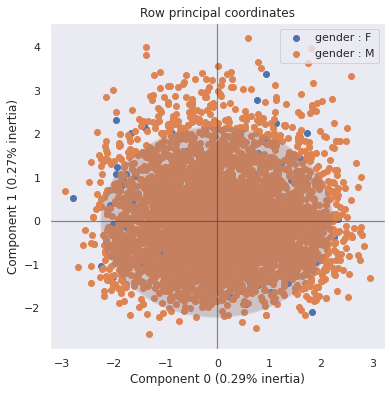

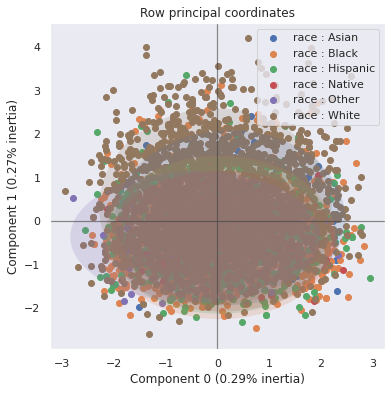

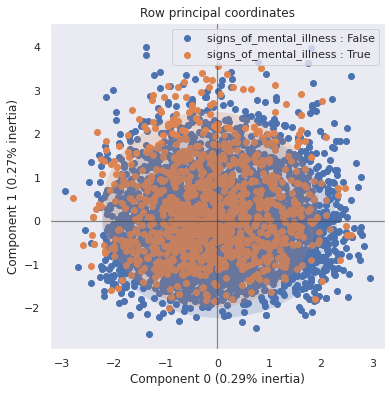

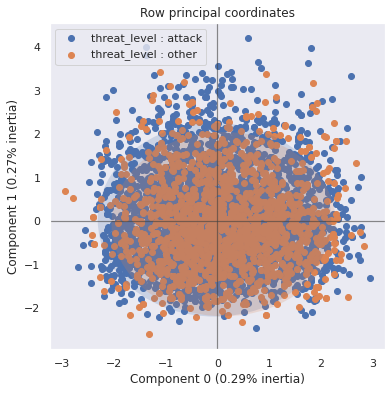

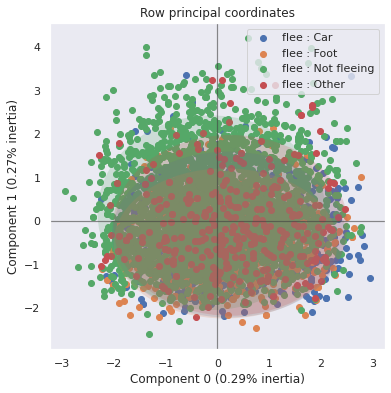

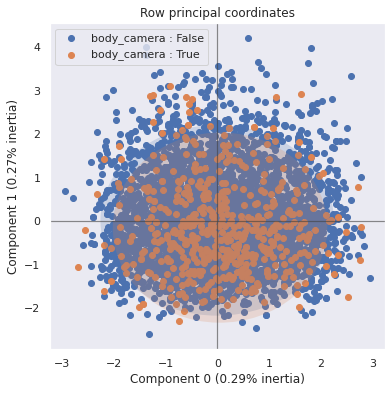

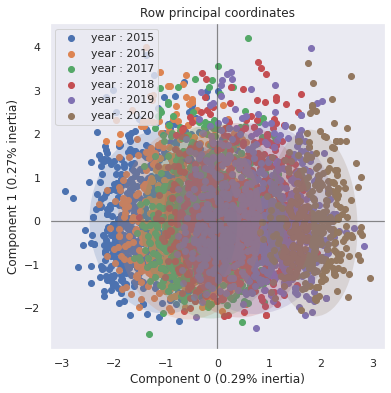

In [ ]:
# plot of the representation of individuals

for c in df.columns:
  l = [c + ' : {}'.format(t) for t in df[c]]
  if len(set(l)) < 10:
    print(c)
    _famd.plot_row_coordinates(
        df,
        ax=None,
        figsize=(6, 6),
        x_component=0,
        y_component=1,
        labels=None,
        color_labels=l,
        ellipse_outline=False,
        ellipse_fill=True,
        show_points=True
      )

Again, we cannot see a real difference with and without imputation.

In [ ]:
# get the correlation between columns in order to plot the variables cloud

column_correlations = famd.column_correlations(df)
cols = column_correlations.index
column_correlations = column_correlations.values
column_correlations

array([[ 5.43434050e-01,  9.82913970e-01, -3.87264097e-01, ...,
         8.12171247e-01, -4.57094838e-01, -9.17751175e-01],
       [ 3.52942462e-02,  8.45585877e-03,  1.95580477e-02, ...,
        -6.21558945e-03,  3.42474257e-02, -3.95510889e-04],
       [ 6.51781373e-03, -1.87970515e-04,  2.54526825e-02, ...,
        -1.54326887e-02,  2.88698027e-02,  5.09741426e-03],
       ...,
       [-4.89790775e-02,  2.72326461e-02, -3.81743724e-02, ...,
         4.87798483e-02, -4.30339915e-02, -5.28364199e-02],
       [ 4.89790775e-02, -2.72326461e-02,  3.81743724e-02, ...,
        -4.87798483e-02,  4.30339915e-02,  5.28364199e-02],
       [ 3.67221073e-01,  5.41721747e-03,  1.32800301e-02, ...,
         1.64549198e-01,  7.54044041e-01, -1.48615720e-01]])

In [ ]:
l = []
for i in range(len(column_correlations)):
  c = column_correlations[i]
  l.append([i, c[0]**2 + c[1]**2])
l.sort(key=lambda x: x[1])
print(l[-10:])
most_explicative_variables = [i for (i,score) in l[-10:]]

[[95, 0.01473728289645956], [2199, 0.015214252934677782], [2189, 0.028355882740243366], [2198, 0.03896984247073896], [2190, 0.041316363367868064], [2202, 0.08162298943169251], [2258, 0.1348806627736234], [2196, 0.29961585182320494], [2187, 0.37856225724415454], [0, 1.2614404377379418]]


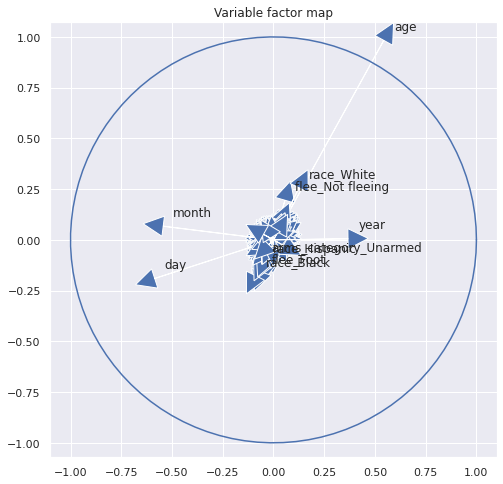

In [ ]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, column_correlations.shape[0]):
      ax.arrow(0,
              0,  # Start the arrow at the origin
              column_correlations[i, 0],  #0 for PC1
              column_correlations[i, 1],  #1 for PC2
              head_width=0.1,
              head_length=0.1)
      if i in most_explicative_variables:
        plt.text(column_correlations[i, 0] + 0.05,
                column_correlations[i, 1] + 0.05,
                cols[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

With this plot of variables, we can see that we may have a problem in the scaling for age (because it exceeds the unit circle) but apart from that, we can recognize some of the matrix of correlation facts (such as the negative correlation between race_black and race_white, which is obvious). The year, month and day seem to contribute the most to the first component and the race and the flee seem to contribute the most to the second. Age contributes to both but mainly to the second one. We can see that apart from age, we do not have a lot of signicative variables, and the most significative ones are all numerical, so we can wonder if it is a bias from the algorithm.

### Hierarchical clustering

In [ ]:
# We now perform hierarchical clustering. 
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

In [ ]:
methods=['single','complete','average'] # methods used for linkage
max_val=0
best_method=None
best_Z=None

for method1 in methods:
    Z=linkage(num_data_scaled,method1,metric='jaccard')
    c, coph_dists = cophenet(Z, pdist(num_data_scaled,'jaccard'))
    if (c>max_val):
        max_val=c
        best_method=method1
        best_Z=Z
    else:
        max_val=max_val
    print(method1, ': ', c)
print('the best cophenet index is about :',max_val,'which corresponds to: method=',best_method)

single :  0.5594571759321063
complete :  0.735577139357118
average :  0.8101986555428158
the best cophenet index is about : 0.8101986555428158 which corresponds to: method= average


We tried with hamming instead of jaccard distance and the results are the same: the average method is the best one, with quite a good cophenet index.

In [ ]:
# We apply hierarchical clustering with this best method
Z = best_Z
print(Z.shape)
Z

(4894, 4)


array([[1.29000000e+02, 9.46000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.60500000e+03, 2.51700000e+03, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+00, 1.50000000e+01, 0.00000000e+00, 2.00000000e+00],
       ...,
       [9.77400000e+03, 9.78500000e+03, 7.06500526e-03, 4.89200000e+03],
       [9.71400000e+03, 9.78600000e+03, 7.24318754e-03, 4.89400000e+03],
       [3.28700000e+03, 9.78700000e+03, 7.70432549e-03, 4.89500000e+03]])

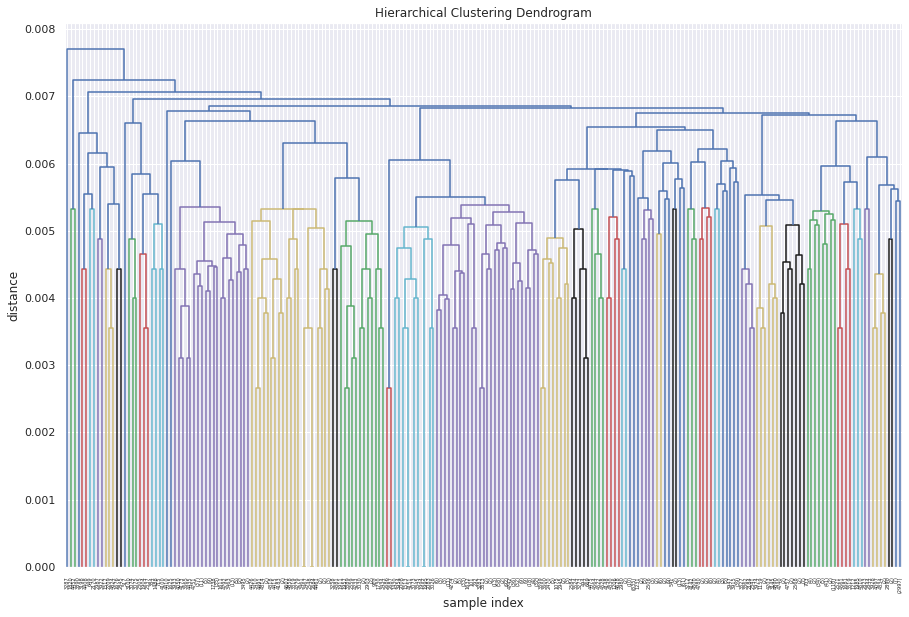

In [ ]:
# We represent the corresponding Dendrogram
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z = Z, truncate_mode='level', p=12)
plt.show()

This dendogram does not show very distinct clusters once again: the distance of separation are always very close. However, it seems that 15 clusters could be a good option, with a distance around 0.066. 
A better metric than jaccard that mixes numerical and nominal values would certainly have lead to better results.